# Project 3 - Part 2 - Exploratory Data Analysis

Tijesunimi Odebode

5/1/2022

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Additional Imports
import os, json, math, time
from yelpapi import YelpAPI
from tqdm.notebook import tqdm_notebook

In [2]:
tmd_2010 = pd.read_csv("Data2/final_tmdb_data_2010.csv.gz", low_memory = False)
tmd_2011 = pd.read_csv("Data2/final_tmdb_data_2011.csv.gz", low_memory = False)
tmd_2012 = pd.read_csv("Data2/final_tmdb_data_2012.csv.gz", low_memory = False)
tmd_2013 = pd.read_csv("Data2/final_tmdb_data_2013.csv.gz", low_memory = False)
tmd_2014 = pd.read_csv("Data2/final_tmdb_data_2014.csv.gz", low_memory = False)
tmd_2015 = pd.read_csv("Data2/final_tmdb_data_2015.csv.gz", low_memory = False)
tmd_2016 = pd.read_csv("Data2/final_tmdb_data_2016.csv.gz", low_memory = False)
tmd_2017 = pd.read_csv("Data2/final_tmdb_data_2017.csv.gz", low_memory = False)
tmd_2018 = pd.read_csv("Data2/final_tmdb_data_2018.csv.gz", low_memory = False)
tmd_2019 = pd.read_csv("Data2/final_tmdb_data_2019.csv.gz", low_memory = False)

In [3]:
tmd_2010

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,tt7258450,0.0,NaN,NaN,0.0,[],NaN,781368.0,en,Christmas Train Spectacular,...,0.0,58.0,[],Released,NaN,Christmas Train Spectacular,0.0,0.0,0.0,NR
2572,tt7503772,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,619076.0,en,Vampire Sisters,...,0.0,52.0,[],Released,NaN,Vampire Sisters,0.0,7.0,1.0,NaN
2573,tt7851834,0.0,/c4x2XPngdiW8Vmc6EmmTXAgzViJ.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,166919.0,ko,여의도,...,0.0,88.0,"[{'english_name': 'Korean', 'iso_639_1': 'ko',...",Released,NaN,A Friend In Need,0.0,6.5,2.0,NaN
2574,tt8090084,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,516206.0,en,Goodbye Dolly,...,0.0,46.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Goodbye Dolly,0.0,0.0,0.0,NaN


## 1. Concatenate the data into 1 dataframe 

In [4]:
## Concatenate the data into 1 dataframe. 
tmd_movies = pd.concat([tmd_2010, tmd_2011, tmd_2012, tmd_2013, tmd_2014, 
                        tmd_2015, tmd_2016, tmd_2017, tmd_2018, tmd_2019],
                      ignore_index=True)
display(tmd_movies)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36829,tt9906644,0.0,/htoReVItKtolso5VJqFqJDBaOwm.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,635903.0,ml,മനോഹരം,...,0.0,122.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Released,Beautiful,Manoharam,0.0,6.2,10.0,NaN
36830,tt9913660,0.0,/z6YpkQiWLnRKl5yQD9dSiPDFWN.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,711261.0,en,No Apology,...,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,No Apology,0.0,8.0,1.0,NaN
36831,tt9913936,0.0,/i4moNlJn4EpSE5auFeoeIae366g.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,594570.0,sv,Paradise,...,0.0,135.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,NaN,Paradise,0.0,8.5,2.0,NaN
36832,tt9914942,0.0,/tjHUeULyw2vtS1DXFp0OHfhUzRX.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,598553.0,ca,La vida sense la Sara Amat,...,0.0,74.0,"[{'english_name': 'Catalan', 'iso_639_1': 'ca'...",Released,NaN,Life without Sara Amat,0.0,7.8,6.0,NaN


In [5]:
tmd_movies['certification'].unique()

array([nan, 'PG-13', 'PG', 'R', 'NR', 'G', 'NC-17', 'R ', 'PG-13 ', '10',
       'Unrated'], dtype=object)

In [6]:
# The following code for replacing multiple characters at once was adapted from:
# https://www.geeksforgeeks.org/python-replace-multiple-characters-at-once/
tmd_movies['certification'] = tmd_movies['certification'].replace('R ','R').replace('PG-13 ', 'PG-13')
tmd_movies['certification'].unique()

array([nan, 'PG-13', 'PG', 'R', 'NR', 'G', 'NC-17', '10', 'Unrated'],
      dtype=object)

## 2. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

- Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [7]:
df_fin = (tmd_movies["budget"] > 0) | (tmd_movies["revenue"] > 0)
df_fin

0        False
1        False
2        False
3        False
4         True
         ...  
36829    False
36830    False
36831    False
36832    False
36833    False
Length: 36834, dtype: bool

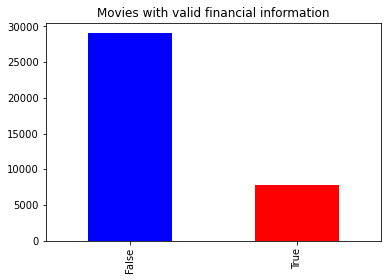

False    29021
True      7813
dtype: int64

In [8]:
fin = df_fin.value_counts()

#Let's give it some color
fin.plot(kind = 'bar', color = ['blue','red'])
plt.title('Movies with valid financial information')
plt.show()

fin

- From the above, it looks like only 110 movies had valid financial information (values > 0 for budget OR revenue). 

## 3. How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [9]:
plotdf = tmd_movies.loc[df_fin]
movie_cat = plotdf['certification'].value_counts().sort_values()
movie_cat

Unrated       1
NC-17        20
G            83
PG          405
NR          616
PG-13      1016
R          1638
Name: certification, dtype: int64

- The above output has the number of movies in each certification category. The values on the left are the certification categories. The values on the right are the numbers of movies.

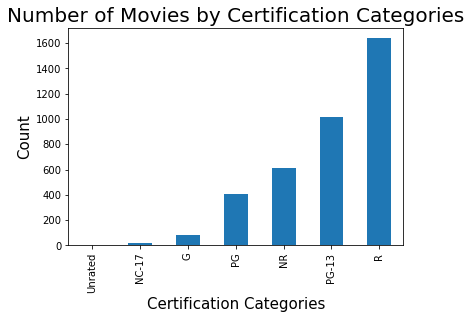

Unrated       1
NC-17        20
G            83
PG          405
NR          616
PG-13      1016
R          1638
Name: certification, dtype: int64

In [10]:
movie_cat.plot(kind = 'bar')
plt.title('Number of Movies by Certification Categories', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Certification Categories', fontsize = 15)

#Show your figure
plt.show()

#Display the count chart the plot
movie_cat

- The above plot shows the number of movies in each certification category. 

## 4. What is the average revenue per certification category?

Text(0.5, 1.0, 'Average revenue per certification category')

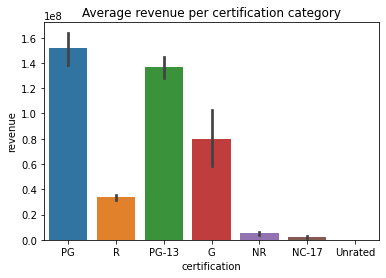

In [11]:
ax = sns.barplot(data=plotdf , x = 'certification', y = 'revenue', ci = 68)
ax.set_title('Average revenue per certification category')

- The above plot has the average revenue per certification category. 

- It is obvious that 'R' category has the highest average revenue

In [12]:
plotdf.groupby('certification')['revenue'].mean()

certification
G          8.001068e+07
NC-17      2.237721e+06
NR         5.048461e+06
PG         1.517992e+08
PG-13      1.365347e+08
R          3.360246e+07
Unrated    0.000000e+00
Name: revenue, dtype: float64

- The above output has the average revenue per certification category. The values on the left are the certification categories. The values on the right are the revenues.

- It is obvious that 'R' category has the highest average revenue

## 5. What is the average budget per certification category?

certification
G          2.536730e+07
NC-17      1.758680e+06
NR         2.519656e+06
PG         4.409978e+07
PG-13      4.168561e+07
R          1.378086e+07
Unrated    2.600000e+02
Name: budget, dtype: float64

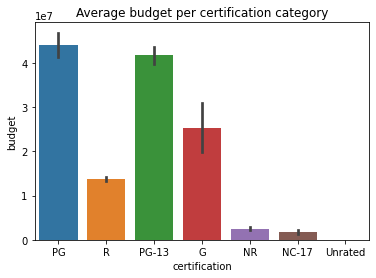

In [13]:
ax = sns.barplot(data=plotdf, x = 'certification', y = 'budget', ci = 68)
ax.set_title('Average budget per certification category')
plotdf.groupby('certification')['budget'].mean()

- The above output and plot have the average budget per certification category. 

- It is obvious that 'R' category has the highest average budget



## 6. Save a final merged .csv.gz of all of the tmdb api data

In [14]:
## Save merged dataframe to file. Saved in 'Data' folder
tmd_movies.to_csv("Data2/tmdb_results_combined.csv.gz",compression='gzip',index=False)

In [15]:
## Save merged dataframe to file. Saved in Home page
tmd_movies.to_csv("tmdb_results_combined.csv.gz",compression='gzip',index=False)